## Machine Learning

### Time series analysis - predict levels of violence based on previous weeks.
We will attempt to predict levels of violence for upcoming weeks based on data from previous weeks. The production of this data could potentially be automated with a script and displayed on the Nepal Monitor platform alongside current data. Any predictions would likely need to have interpretable metrics and be displayed with a confidence score for purposes of accountability

### Data Preparation:

In [1]:
#list available files in directory
print('Raw Files:')
! ls Data
print('\nProcessed Files:')
! ls Data/output/

Raw Files:
1519759656_39328483.csv
2017 PMP Data Final No Duplicates.xlsx
Federal_VDC_Relation_web_clean.xlsx
Federal_VDC_Relation_web.xlsx
nepalmonitor-reports.csv
nepalmonitor-reports_old.csv
nepal_population_household_ward-2011.csv
NM_2016_17export.csv
npl_polbanda_adm5_wad_25k_50k_sdn_wgs84.csv
output

Processed Files:
District_Province_Population  pop_incidents_VDC.csv
NM_2016_17clean.csv	      sources_vdc.csv


In [2]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

#set up a custom qualitative color palette
xkcd_colors = ['purple','green','blue','pink','brown','red','light blue',\
              'tan','light green','magenta','yellow','sky blue','teal','orange','light purple']
catpal = sns.xkcd_palette(xkcd_colors)


#Import Primary Data Frames
cleanpath='Data/output/NM_2016_17clean.csv'#clean 2017 dataset
newpath = 'Data/nepalmonitor-reports.csv'#NM latest export - new site version
df = pd.read_csv(cleanpath)
new_df = pd.read_csv(newpath)

print(df.shape[0],'x',df.shape[1])
print(new_df.shape[0], 'x',new_df.shape[1])

6630 x 68
7027 x 55


Previous data cleaning efforts have focused on export data, from the previous Nepal Monitor platform. As of November 2018 a new version of NepalMonitor has been deployed, with a significantly streamlined export file. Machine Learning will focus on this new file format (new_df). 

In [3]:
#convert 'INCIDENT DATE' column to date time objects
#df.index = pd.to_datetime(df.loc[:,'INCIDENT DATE'])
#df = df.loc['2017',:]

    
new_df.loc[:,'Event Date'] = pd.to_datetime(new_df.loc[:,'Event Date'])
new_df.index = pd.to_datetime(new_df.loc[:,'Event Date'])
#new_df = new_df.loc['2017':'2018',:]# < taken out to have part of the 2017 data

print(df.shape)
print(new_df.shape)
new_df.head()

(6630, 68)
(7027, 55)


,#,Title,Nepali Title,Event Date,Publication Date,Location,Description,Nepali Description,Tags,Latitude,...,Youth raped,Total abducted,Female abducted,Youth abducted,Total damaged buildings,Severely damaged buildings,Total damaged vehicles,Severely damaged vehicles,Election-related cause - primary,Election-related cause - secondary
Event Date,,,,,,,,,,,,,,,,,,,,,
2018-11-30,21473,"Eight-year-old boy abducted, murdered","गोंगबुमा ८ वर्षीय बालकको अपहरणपछि हत्या, झोलाम...",2018-11-30,2018-11-30,"Province 3, Kathmandu",Eight-year-old boy Prayas Kunwar of Birendra-A...,काठमाडौंको गोंगबुमा ८ वर्षीय बालकको अपहरणपछि ह...,Interpersonal Violence,27.742333942136217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2018-11-28,21471,Rape accused arrested,बलात्कार घटनाका आरोपित गिरफ्तार ।,2018-11-28,2018-11-29,"Province 5, Rupandehi, Sainamaina, Ward 7",Police on Wednesday arrested 28-year-old Kesha...,१५ वर्षीया बालिकालाई बलात्कार गरेको आरोपमा प्र...,GBV\nChildren’s Rights,27.703940606896413,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2018-11-27,21459,Right activists stage sit-in demanding justice...,नेपालगन्जमा न्यायका लागि धर्ना।,2018-11-27,2018-11-27,"Province 5, Banke, Nepalgunj",Right activists in Nepalgunj have staged a sit...,कञ्चनपुरकी किशोरी निर्मला पन्तका हत्यारालाई का...,GBV,28.062662265656087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-27,21460,Students padlock office of Trichandra College ...,त्रिचन्द्र कलेजमा तालाबन्दी ।,2018-11-27,2018-11-27,"Province 3, Kathmandu, Kathmandu",Students of Tri Chandra College in Kathmandu o...,शुल्क वृद्धि फिर्ता गर्न माग राख्दै आन्दोलनमा ...,Governance,27.71453911602393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-27,21466,Complaint lodged agaist rape accused,बलात्कार घटनाका आरोपितविरूद्ध उजुरी दर्ता,2018-11-27,2018-11-28,"Province 5, Rupandehi, Mayadevi, Ward 1",A rape complaint was filed against 30 years o...,३० वर्षीया महिलालाई बलात्कार गरेको आरोपमा माया...,GBV,27.584842280023107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [4]:
#Drop out unneeded columns
new_drop = ['#','Title','Nepali Title', 'Ward','Publication Date','Event Date',
            'Province','Nepali Description','Tags','Location','Latitude','Longitude']

#train_df = df.dropna(axis=1, how='all')#.sort_index(axis=1)
test_df = new_df.dropna(axis=1, how='all')#.sort_index(axis=1)


#train_df.drop(drop, axis=1, inplace=True)
test_df.drop(new_drop, axis=1, inplace=True)



In [5]:
#Fix minor inconsistencies in export file to facilitate dummy creation

#Some cells include the same cateogry name repeated on a new line. Strip out the second line.
def strip_newline(string):
    if type(string) == str:
        return string.split('\n')[0]#.lower().replace('nonviolent', 'non-violent').strip()
    else:
        return string

#Strip out anything contained in () and make everything lowercase
def strip_paren(string):
    if type(string) == str:
        return string.split('(')[0].lower()#.replace('nonviolent', 'non-violent').replace('noyouth', 'no-youth').strip()
    else:
        return string

#train_df = train_df.applymap(strip_paren)
full_df = test_df.applymap(strip_newline).applymap(strip_paren)

#train_df.append(test_df) < it looks like the variables are coded differently let's just use 1 dataset for now
full_df.loc[:,'Total killed'] = (full_df.loc[:,'Total killed'] == '1').astype(int)



In [6]:
#One-hot encode categorical columns
dummies = ['Violent / Nonviolent', 'Onesided / Twosided', 'Collective / Interpersonal', 'Event Form - Primary', 'Event Form - Secondary', 'Weapons', 'Cause - Primary', 'Cause - Secondary', 'Actor 1 - Affiliation', 'Actor 1 - Entity', 'Actor 1 - Youth/non-youth', 'Actor 2 - Target', 'Actor 2 - Affiliation','Actor 2 - Youth/non-youth']
#full_df = full_df.applymap(strip_newline)
#incidents_date_train = pd.get_dummies(train_df, columns=dummies, dummy_na=False)#, drop_first=True)
incidents_date_test = pd.get_dummies(full_df, columns=dummies, dummy_na=False)#, drop_first=True)


#strip out blank dummy categories 
for col in dummies:
    badstr = col+'_'
    if badstr in incidents_date_test.columns:
        incidents_date.drop(badstr, inplace=True, axis=1)
        print('dropped useless category:', badstr)
    

in_week = incidents_date_test.resample('W').sum()
in_day = incidents_date_test.resample('D').sum()
print(in_week.shape)
print(in_day.shape)
in_week.head()


(101, 320)
(699, 320)


,Total killed,Female killed,Youth killed,Total injured,Female injured,Total raped,Female raped,Youth raped,Total abducted,Female abducted,...,Actor 2 - Affiliation_security forces - apf,Actor 2 - Affiliation_security forces - army,Actor 2 - Affiliation_security forces - police,Actor 2 - Affiliation_security forces - security forces,Actor 2 - Affiliation_students,Actor 2 - Affiliation_unclear,Actor 2 - Youth/non-youth_na,Actor 2 - Youth/non-youth_noyouth,Actor 2 - Youth/non-youth_unknown,Actor 2 - Youth/non-youth_youth
Event Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2,3.0,3.0,8.0,4.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,4,1,2,4
2017-01-08,9,5.0,5.0,20.0,2.0,7.0,7.0,6.0,0.0,0.0,...,0,0,2,0,0,0,28,9,8,14
2017-01-15,11,4.0,3.0,10.0,4.0,6.0,6.0,6.0,1.0,0.0,...,0,0,0,0,0,0,20,10,7,16
2017-01-22,4,1.0,1.0,62.0,5.0,5.0,5.0,3.0,1.0,0.0,...,0,0,2,0,0,0,28,6,14,6
2017-01-29,8,1.0,5.0,34.0,3.0,10.0,10.0,7.0,1.0,0.0,...,0,0,1,0,0,0,19,11,14,15


Above, we have created a separate column for each variable tracked by the project, and given it a 1 if it was marked and a 0 if not (one hot encoding) and aggregated them by day and week.

In [7]:
#function for converting pandas time series dataframe to training set for supervised learning
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
        Returns:
        Pandas DataFrame of series framed for supervised learning.
        https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%03d)' % (df.columns[j], i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % (df.columns[j])) for j in range(n_vars)]
        else:
            names += [('%s(t+%03d)' % (df.columns[j], i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [8]:
#Create a time shifted dataframe of all variables.
def make_timeshift(df, lookback):
    time_shift = series_to_supervised(df, lookback, dropnan=False).fillna(0)
    return time_shift

lookback=1
time_shift_week = make_timeshift(in_week, lookback)
time_shift_day = make_timeshift(in_day, lookback)
print(time_shift_day.shape)
print(time_shift_week.shape)
test = pd.concat([time_shift_week['Total killed(t-001)'],time_shift_week['Total killed(t)']],axis=1)
print(test[:5])
time_shift_week.head()

(699, 640)
(101, 640)
            Total killed(t-001)  Total killed(t)
Event Date                                      
2017-01-01                  0.0                2
2017-01-08                  2.0                9
2017-01-15                  9.0               11
2017-01-22                 11.0                4
2017-01-29                  4.0                8


,Total killed(t-001),Female killed(t-001),Youth killed(t-001),Total injured(t-001),Female injured(t-001),Total raped(t-001),Female raped(t-001),Youth raped(t-001),Total abducted(t-001),Female abducted(t-001),...,Actor 2 - Affiliation_security forces - apf(t),Actor 2 - Affiliation_security forces - army(t),Actor 2 - Affiliation_security forces - police(t),Actor 2 - Affiliation_security forces - security forces (t),Actor 2 - Affiliation_students(t),Actor 2 - Affiliation_unclear(t),Actor 2 - Youth/non-youth_na(t),Actor 2 - Youth/non-youth_noyouth(t),Actor 2 - Youth/non-youth_unknown(t),Actor 2 - Youth/non-youth_youth(t)
Event Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,4,1,2,4
2017-01-08,2.0,3.0,3.0,8.0,4.0,1.0,1.0,1.0,0.0,0.0,...,0,0,2,0,0,0,28,9,8,14
2017-01-15,9.0,5.0,5.0,20.0,2.0,7.0,7.0,6.0,0.0,0.0,...,0,0,0,0,0,0,20,10,7,16
2017-01-22,11.0,4.0,3.0,10.0,4.0,6.0,6.0,6.0,1.0,0.0,...,0,0,2,0,0,0,28,6,14,6
2017-01-29,4.0,1.0,1.0,62.0,5.0,5.0,5.0,3.0,1.0,0.0,...,0,0,1,0,0,0,19,11,14,15


The functions above take the aggregated data and "time-shift" it so that can be used for supervised learning. It essentially puts a series of weeks on the same row as a given number of previous weeks represented by the "lookback" variable. The previous weeks will be used as input and the subsequent weeks will be used to train and score predictions based on that output. Next we will need a "holdout" set to evaluate whether the model we train can predict based on data that it hasn't "seen before"

In [9]:
#Create X y - also do the holdhout split 
def create_X_y(df, holdpc=.25):
    holdsize = int(holdpc * len(df.index))
    y = df.loc[:,'Total killed(t)':]#.iloc[:-holdsize,:]
    X = df.loc[:,:'Actor 2 - Youth/non-youth_youth(t-001)']#.iloc[:-holdsize,:]
    
    holdout_y = df.loc[:,'Total killed(t)':].iloc[-holdsize:,:]
    holdout_X = df.loc[:,:'Actor 2 - Youth/non-youth_youth(t-001)'].iloc[-holdsize:,:]

    return X, y, holdout_X, holdout_y

X_day, y_day, holdout_X_day, holdout_y_day = create_X_y(time_shift_day)

X_week, y_week, holdout_X_week, holdout_y_week = create_X_y(time_shift_week)

for x in [X_day, y_day, holdout_X_day, holdout_y_day, X_week, y_week, holdout_X_week, holdout_y_week]:
    print(x.shape)


y_week.head()

(699, 320)
(699, 320)
(174, 320)
(174, 320)
(101, 320)
(101, 320)
(25, 320)
(25, 320)


,Total killed(t),Female killed(t),Youth killed(t),Total injured(t),Female injured(t),Total raped(t),Female raped(t),Youth raped(t),Total abducted(t),Female abducted(t),...,Actor 2 - Affiliation_security forces - apf(t),Actor 2 - Affiliation_security forces - army(t),Actor 2 - Affiliation_security forces - police(t),Actor 2 - Affiliation_security forces - security forces (t),Actor 2 - Affiliation_students(t),Actor 2 - Affiliation_unclear(t),Actor 2 - Youth/non-youth_na(t),Actor 2 - Youth/non-youth_noyouth(t),Actor 2 - Youth/non-youth_unknown(t),Actor 2 - Youth/non-youth_youth(t)
Event Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2,3.0,3.0,8.0,4.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,4,1,2,4
2017-01-08,9,5.0,5.0,20.0,2.0,7.0,7.0,6.0,0.0,0.0,...,0,0,2,0,0,0,28,9,8,14
2017-01-15,11,4.0,3.0,10.0,4.0,6.0,6.0,6.0,1.0,0.0,...,0,0,0,0,0,0,20,10,7,16
2017-01-22,4,1.0,1.0,62.0,5.0,5.0,5.0,3.0,1.0,0.0,...,0,0,2,0,0,0,28,6,14,6
2017-01-29,8,1.0,5.0,34.0,3.0,10.0,10.0,7.0,1.0,0.0,...,0,0,1,0,0,0,19,11,14,15


When the holdout percentage (holdout_pc) is set to .25 the holdout set represented approximately by the final 6 months of 2018

## Train predictive models:

The following is a core set of functions for training and testing several machine learning models.

Dry Run:
unable to fetch coefs, trying importance...


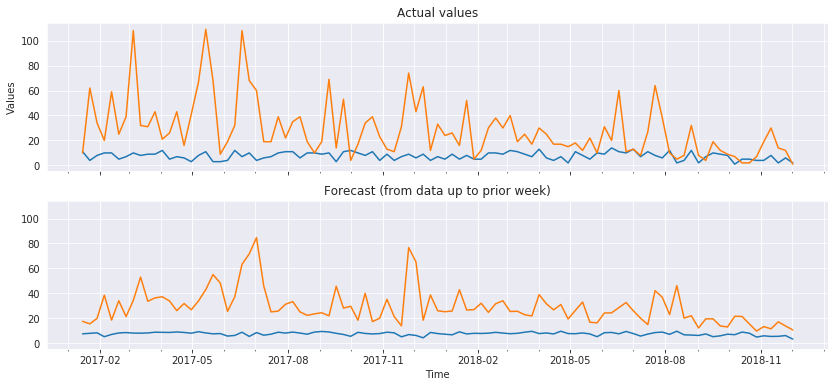

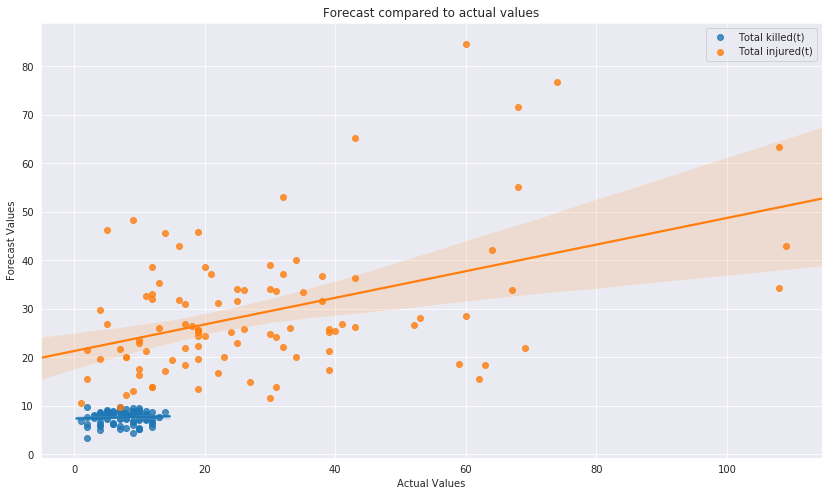

R_2:			 [-0.11192525  0.17204636]
Explained Variance:	 [-0.11166493  0.17215833]
Mean Squared Error:	 [  3.23477007  20.58539985]


In [55]:
#Train and test a given model

#import modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
#from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import check_cv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor 
import matplotlib.dates as mdates

#create imputer for nan values - not currently used
imp = Imputer(missing_values='NaN', strategy = 'mean')


def plot_model(y_test, y_pred):
    '''Function to visualize what the model is doing to assist in evaluation'''
    
    months = mdates.MonthLocator()  # every month
    #put the predictions and desired values in a dataframe next to each other
    sync = pd.DataFrame(y_pred, index=y_test.index) #index=y_test.index)
    #print(sync.head())    
    
    #create subplots
    sns.set_style('darkgrid')
    
    f, ax = plt.subplots(2,1, figsize=(14,6), sharex=True)
    
    
    #plot the input values
    #ax[0].plot(X_test.sort_index())
    #ax[0].set_title('Test Input (previous weeks)')
    
    #plot the actual values
    ax[0].plot(y_test.sort_index())
    ax[0].set_title('Actual values')
    
    
    #plot the predictions
    ax[1].plot(sync.sort_index())
    ax[1].set_title("Forecast (from data up to prior week)")
    
  
    #show the plot
    ax[1].set_ylim(ax[0].get_ylim())
    ax[1].set_xlabel('Time')
    ax[0].set_ylabel('Values')
    ax[1].legend(bbox_to_anchor=(1,1))
    #locs, labels = plt.xticks()
    for x in range(2):
        ax[x].xaxis.set_minor_locator(months)
        ax[x].tick_params(which="both", bottom=True)
        ax[x].grid(which='minor')
    plt.show()
    
    #plot a comparison of the actual values next to the predictions - in a seperate figure
    f, ax = plt.subplots(figsize=(14,8))
    
    for var in range(y_test.shape[1]):
        sns.regplot(y_test.iloc[:,var], sync.iloc[:,var], ax=ax, label=y_test.columns[var])
    ax.set_title('Forecast compared to actual values')
    ax.set_ylabel('Forecast Values')
    ax.set_xlabel('Actual Values')
    
    if y_test.shape[1] < 15:
        ax.legend(bbox_to_anchor=(1,1))
    
    #show the plot
    plt.show()

def test_model(X_train, X_test, y_train, model):
    '''Function to make predicitons using the model based on training input'''
    #fit the model to the training set
    model.fit(X_train, y_train)

    #predict outcomes beased on training set
    y_pred = model.predict(X_test)
    
    #bandaid to set negative predictions to 0
    np.clip(y_pred, a_min=0, a_max=None, out=y_pred)
    
    return y_pred, model #ypred.astype(int, copy=False) < well set all the estimates to whole numbers


def score_model(X_train, X_test, y_train, y_test, y_pred, model, verbose=False):
    '''fuction to score the model according to several metrics and return those metrics'''
    
    #score model
    #train_score = model.score(X_train, y_train)
    #test_score = model.score(X_test, y_test)
    r_2 = r2_score(y_test.astype(float), y_pred.astype(float), multioutput='raw_values') #
    ev = explained_variance_score(y_test.astype(float), y_pred.astype(float), multioutput='raw_values')
    rmse = np.sqrt(mean_squared_error(y_test.astype(float), y_pred.astype(float), multioutput='raw_values'))
       
    
    #get array of coefiecents 
    coefs = np.empty((y_train.shape[1],X_train.shape[1]))
    try:
        for n in range(len(model.estimators_)):
            coefs[n] = model.estimators_[n].coef_  #you can get a list of feature names and coefs here in a loop and combine.
    except:
        try:    
            coefs = model.coef_#np.empty(y_pred.shape)
        except:
            try:
                print('unable to fetch coefs, trying importance...')
                coefs = model.feature_importances_
                
            except:
                print('Failed!')
    
    if verbose > 0:
        #Plot what these look like with fuction above
        plot_model(y_test, y_pred)
    
    #return train_score, test_score, r_2, ev, rmse, coefs, 
    return r_2, ev, rmse, coefs, 


def try_model(X, y, model, verbose=0, random_state=None):
    '''fuction to that takes a given model and a dataset, and evaluates the model
        -gives the option to plot relivant data
        -returns relivant scoring metrics'''

    #Split X and Y into training and testing sets < - try modifying these functions for 'sliding window'
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, shuffle=False, random_state=random_state)
    tscv = TimeSeriesSplit(n_splits=len(y)-1)
    
    
    #idx = 0
    y_pred = np.empty_like(y)
    y_control = np.empty_like(y)
    for train_index, test_index in tscv.split(X):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        #use function above to train model and create predictions
        y_pred[test_index], model = test_model(X_train, X_test, y_train, model)
        
        #debug logging
        y_control[test_index] = y.iloc[test_index-1]
        if test_index.sum() < 0:
            print('\nRun:\t',test_index)
            print('X_train:\t', X_train.iloc[:,:2])
            print('y_train:\t', y_train.iloc[:,:2])
            print('X_test:\t', X_test.iloc[:,:2])
            print('y_pred:\t', y_pred[test_index])
            print('y_test:\t', y_test.iloc[:,:2])
    
    y_test = y #for better plotting
    
    #return train/test split, predicitons and control - with front two datapoints chopped off 
    return X_train[2:], X_test[2:], y_train[2:], y_test[2:], y_pred[2:], y_control[2:] 
    
#define y
y = y_week.loc[:,['Total killed(t)','Total injured(t)']] # > in_week.loc[:,'Total killed'].quantile(.5)      


print('Dry Run:')
#give the function to try a given model a dry run to see if it works.
X_train, X_test, y_train, y_test, y_pred, y_control = try_model(X_week, y, RandomForestRegressor(random_state=56), verbose = 2, random_state=56)
dry_scores = score_model(X_train, X_test, y_train, y_test, y_pred, model, verbose=True)
print('R_2:\t\t\t',dry_scores[0])
print('Explained Variance:\t', dry_scores[1])
print('Mean Squared Error:\t', dry_scores[2])

The visualization above is the output of a "dry run" of one model, with a prediction of two variables to ensure the core functions are working correctly. 

Ideally trends in the forecast for a given week or month, should line up with the trends in the actual values for that week. There appears to be a tendency of the forecast to lag behind trends in actual values, but in a few examples of the dry run the peaks and valleys in the trend and the forecast seem to match perfectly. Such as between 2018-04 and 2018-05. This could be the result of random variation, but may also indicate the presence of leading indicators. 

In the scatter plot comparing actual values to forecast values, a line closer to 45 degrees and indicates more of the variation in values are explained in the model, and the more closely the dots are to a given line, the smaller the error is.  These scores are indicated numerically by Root Mean Squared Error (standard deviation of the error), explained variance (how much of the variance in the forecast is explained by the model) and R^2(which is a bit like mix of both).  In a final product on Nepal Monitor, Root Mean Squared Error could be transformed into margin of error or confidence interval to indicate the accuracy of the prediction

### Find variables with the best prediction scores

All Variables
unable to fetch coefs, trying importance...
unable to fetch coefs, trying importance...
top score r_2: 0.280446059115
top score explained variance: 0.321124607536
best score rmse: 0.442559132612

control test - forcast using exact values of previous week:
top score r_2: 0.400425267088
top score explained variance: 0.400431029515
best score rmse: 0.550481882563

Top Scoring Variables:


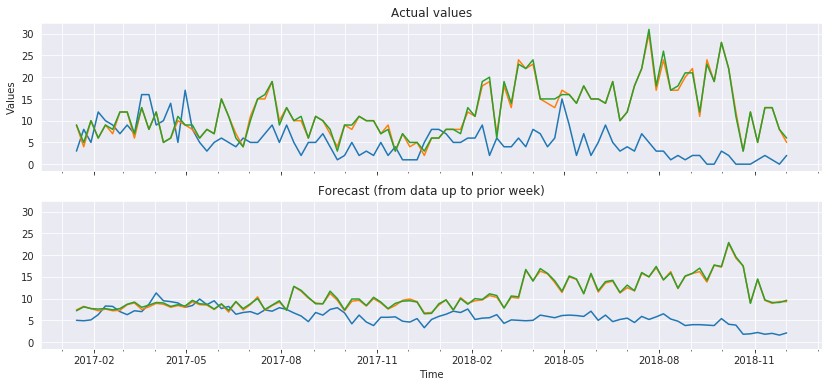

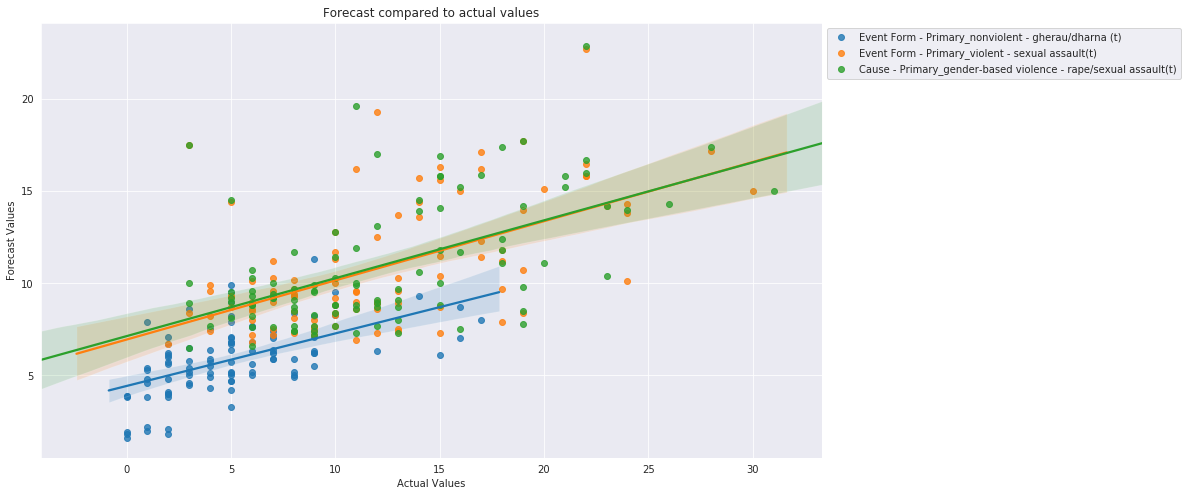

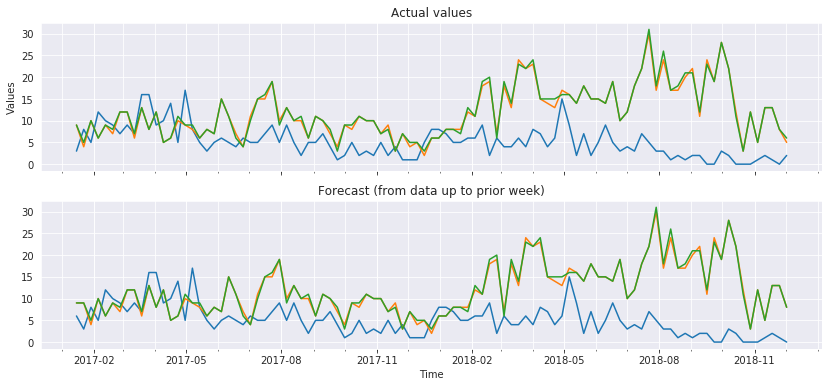

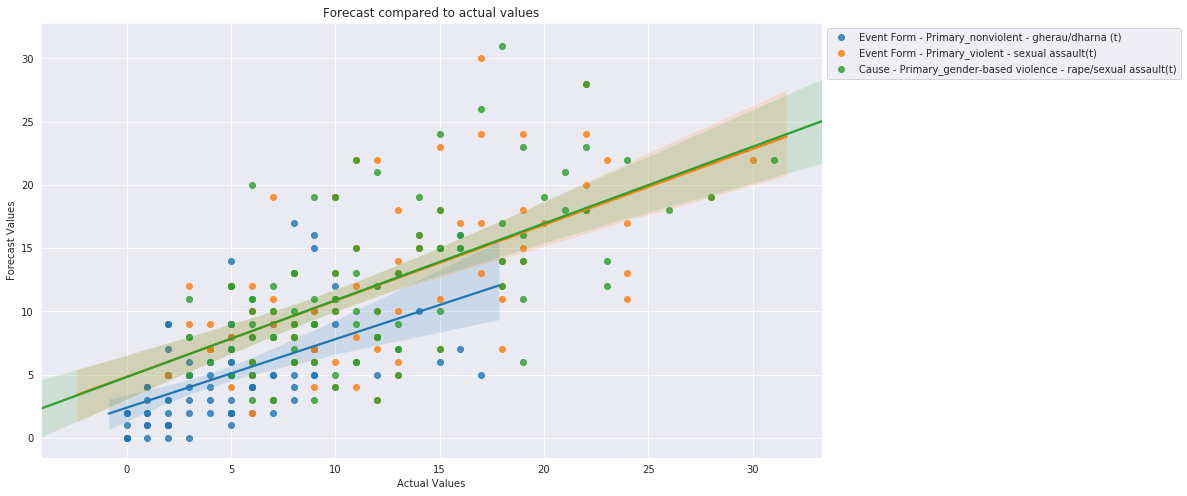

,r_2,explained_variance,root_mean_squared_error,r_2_c,explained_variance_c,root_mean_squared_error_c,r_2
Event Form - Primary_violent - sexual assault(t),NaN,0.321125,5.02997,0.211144,0.21119,5.26663,0.280446
Cause - Primary_gender-based violence - rape/sexual assault(t),NaN,0.310869,5.13022,0.221603,0.221628,5.30009,0.270697
Event Form - Primary_nonviolent - gherau/dharna (t),NaN,0.307715,3.13279,0.0897701,0.0898925,3.48445,0.264228
Violent / Nonviolent_nonviolent(t),NaN,0.298906,9.5567,0.0941051,0.0947098,10.5558,0.257469
Total raped(t),NaN,0.268435,5.19448,0.0199168,0.0199198,5.76913,0.205440
Female raped(t),NaN,0.24278,5.07164,0.0245817,0.0245849,5.54959,0.185361
Actor 1 - Youth/non-youth_noyouth(t),NaN,0.193403,4.2652,-0.0864838,-0.0864792,4.87106,0.166983
Actor 1 - Youth/non-youth_unknown(t),NaN,0.185878,21.5892,-0.0422835,-0.0420202,24.1481,0.166911
Youth raped(t),NaN,0.17998,4.64549,-0.142222,-0.142206,5.30294,0.123443
Actor 2 - Youth/non-youth_na(t),NaN,0.165639,16.6307,0.043861,0.0440733,17.6246,0.148662


In [62]:
#find which variables have the best scores
from sklearn.linear_model import ARDRegression

def find_var (X, df, model, n_true, verbose=False, random_state=None):
    scores = pd.DataFrame(index=df.columns, columns=['r_2','explained_variance','root_mean_squared_error','r_2_c','explained_variance_c','root_mean_squared_error_c'])
    
    pc_true = [sum(df[x] >= 1)/len(df[x])*100 > n_true for x in df.columns]

    y = df.loc[:,pc_true] #filter out varables the perentage "true" is less than n_true
      
    X_train, X_test, y_train, y_test, y_pred, y_control = try_model(X, y, model, verbose=False, random_state=random_state)
    
       #use function above to score the model based on predictions -
    r_2, ev, rmse, coefs  = score_model(X_train, X, y_train, y_test, y_pred, model, verbose=False)
    
    #Score the model based on simply continuing the values from the previous week. 
    r_2_c, ev_c, rmse_c, _ = score_model(X_train, X, y_train, y_test, y_control, model, verbose=False)
    
    if verbose > 0:
        #print scores
        #print('total train score:', train_score )
        #print('total test score:', test_score)
        print('top score r_2:',r_2.max())
        print('top score explained variance:',ev.max())
        print('best score rmse:',rmse.min()) 
        
        print('\ncontrol test - forcast using exact values of previous week:')
        print('top score r_2:',r_2_c.max())
        print('top score explained variance:',ev_c.max())
        print('best score rmse:',rmse_c.min())

    #save all these scores in a data frame
    scores.loc[pc_true,'\nr_2'] = r_2
    scores.loc[pc_true,'explained_variance'] = ev
    scores.loc[pc_true,'root_mean_squared_error'] = rmse

    scores.loc[pc_true,'r_2_c'] = r_2_c
    scores.loc[pc_true,'explained_variance_c'] = ev_c
    scores.loc[pc_true,'root_mean_squared_error_c'] = rmse_c
    
    #filter out explained variance scores below 0
    top = scores.loc[scores['explained_variance'] > 0].sort_values('explained_variance', ascending=False)
    
    #filter out scores that don't beat the control - (errors are higher than control)
    worse = top.loc[top['root_mean_squared_error'] > top['root_mean_squared_error_c']]
    top.drop(worse.index, inplace=True)
    
    #plot what the best scores look like. 
    print("\nTop Scoring Variables:")
    yfilt = [ x in top[:3].index.tolist() for x in y_test.columns]
    plot_model(y_test.loc[:,yfilt], y_pred[:,yfilt])
    
    #plot what the control scores look like
    plot_model(y_test.loc[:,yfilt], y_control[:,yfilt])
    
    #top_scores = score_model(X_train, X, y_train.loc[:,top.index[:3]], y.loc[:,top.index[:3]], y_pred.loc[:,top.index[:3]], model, verbose=verbose)
    #top_scores = find_var(X_week, y_week.loc[:,better.index[:3]], model, n_true=20, verbose=2, random_state=38)
    return scores, top

if __name__ == '__main__': #protect windows from parallel processes(if you run windows)
#for step in range(5,y_week.shape[1])[::5]:
    #model = MultiOutputRegressor(ARDRegression(), n_jobs=-1)
    #model = MultiOutputRegressor(BayesianRidge(), n_jobs=-1)
    #model = LinearRegression()
    model = RandomForestRegressor(random_state=56)
    
    print("All Variables")
    scores, top = find_var(X_week, y_week, model, n_true=20, verbose=2, random_state=38)
    
    #print df of top scores that beat control
scores.sort_values('explained_variance', ascending=False)
    

The model is doing well when asked to predict everything from everything, loses effectiveness when asked to predict a narrow set of variables.  May have to change how scoring / plot works. Luckily it seems to do significantly better than control (assuming value will be the same as the previous week). Perhaps use classifier to predict increase or decrease is an option.

### Comparatively Evaluate Predictive Models

In [12]:
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import TheilSenRegressor



def search_models(modellist, catlist, verbose=False, random_state=False):
    categories = y_week.columns.tolist()
    scoresdf = pd.DataFrame(index=categories)
    warnings.filterwarnings("ignore")
    for model in modellist:
        #par = model.get_params
        modelstring = str(model)[:13]
        print('\n{}:'.format(modelstring))
        try:
            print('Trying Native Multioutput...')
            model_scoresdf = find_var(X_week, y_week[catlist], model, n_true=10, verbose=verbose, random_state=random_state)
        except:
            print('Failed... Using MultiOutput wrapper')
            model_scoresdf = find_var(X_week, y_week[catlist], MultiOutputRegressor(model, n_jobs=-1), n_true=10, verbose=verbose, random_state=random_state)
        
        print('Top 3 scores:\n',model_scoresdf['explained_variance'].sort_values(ascending=False)[:3])
        
        
        
        scoresdf = scoresdf.join(model_scoresdf, how='left', sort=False, rsuffix=('_'+modelstring))
        #top5 = scoresdf.sort_values(scoresdf.columns.tolist(), axis=0, ascending=False)[:5]
        #top5_col = top5.sort_values(top5.index.tolist(), axis=1, ascending=False).iloc[:,:1]
        #print(top5_col)
        
        #label first section of df < debug later
        if scoresdf.shape[1] == 3:
            new_cols = scoresdf.columns.tolist()
            for x in range(3):
                new_cols[x] = new_cols[x] + '_' + modelstring
            scoresdf.columns = new_cols
            print('appended', modelstring, 'to first column name')
    
    print('Bing!')
    return scoresdf

if __name__ == '__main__': #protect windows from parallel processes(if you run windows)
    random_state=56
    modellist=[RandomForestRegressor(random_state=random_state),
               LinearRegression(),
               #ARDRegression(), <throws a big error
               BayesianRidge(),
               ElasticNet(random_state=random_state),
               #ElasticNetCV(random_state=random_state), < save automatic Cv for holdout sets
               #HuberRegressor(),
               #Lars(random_state=random_state), < tiny results
               Lasso(random_state=random_state),
               #MultiTaskLassoCV(random_state=random_state),<way too slow
               PassiveAggressiveRegressor(random_state=random_state),
               Perceptron(random_state=random_state),
               TheilSenRegressor(random_state=random_state)]
               #RidgeCV()]
    
    scoresdf = search_models(modellist, top.index, random_state=random_state)
    scoresdf.head()


RandomForestR:
Trying Native Multioutput...
unable to fetch coefs, trying importance...
unable to fetch coefs, trying importance...
Top 3 scores:
 Actor 2 - Target_political organization/politician - nepali congress and affiliated org(t)     0.14923
Event Form - Primary_violent - remote violence(t)                                             0.141634
Actor 1 - Affiliation_unclear(t)                                                              0.133163
Name: explained_variance, dtype: object

LinearRegress:
Trying Native Multioutput...
Top 3 scores:
 Event Form - Primary_violent - remote violence(t)                                              0.529606
Actor 2 - Target_political organization/politician - nepali congress and affiliated org(t)   -0.0395391
Event Form - Secondary_nonviolent - other forms of non-violent political protest(t)           -0.155078
Name: explained_variance, dtype: object

BayesianRidge:
Trying Native Multioutput...
Failed... Using MultiOutput wrapper
Top 3 scor

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/home/nhorning/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7fb00b7a7540, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/nhorning/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/nhorni.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7fb00b7a7540, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/nhorning/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/nhorni.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 5
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 5), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 5)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=5)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'import warnings\nfrom sklearn.ensemble import Ran...x, random_state=random_state)\n    scoresdf.head()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 21, 20, 25, 51, 148290, tzinfo=tzutc()), 'msg_id': '0608F17675F24778A50534A6EFA99FB7', 'msg_type': 'execute_request', 'session': 'A8A0D9BE9DC84C7CB231190049C595CC', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0608F17675F24778A50534A6EFA99FB7', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'A8A0D9BE9DC84C7CB231190049C595CC']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'import warnings\nfrom sklearn.ensemble import Ran...x, random_state=random_state)\n    scoresdf.head()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 21, 20, 25, 51, 148290, tzinfo=tzutc()), 'msg_id': '0608F17675F24778A50534A6EFA99FB7', 'msg_type': 'execute_request', 'session': 'A8A0D9BE9DC84C7CB231190049C595CC', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0608F17675F24778A50534A6EFA99FB7', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'A8A0D9BE9DC84C7CB231190049C595CC'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'import warnings\nfrom sklearn.ensemble import Ran...x, random_state=random_state)\n    scoresdf.head()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 12, 21, 20, 25, 51, 148290, tzinfo=tzutc()), 'msg_id': '0608F17675F24778A50534A6EFA99FB7', 'msg_type': 'execute_request', 'session': 'A8A0D9BE9DC84C7CB231190049C595CC', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0608F17675F24778A50534A6EFA99FB7', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='import warnings\nfrom sklearn.ensemble import Ran...x, random_state=random_state)\n    scoresdf.head()', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'import warnings\nfrom sklearn.ensemble import Ran...x, random_state=random_state)\n    scoresdf.head()'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('import warnings\nfrom sklearn.ensemble import Ran...x, random_state=random_state)\n    scoresdf.head()',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('import warnings\nfrom sklearn.ensemble import Ran...x, random_state=random_state)\n    scoresdf.head()',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='import warnings\nfrom sklearn.ensemble import Ran...x, random_state=random_state)\n    scoresdf.head()', store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Import object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.FunctionDef object>, <_ast.If object>], cell_name='<ipython-input-12-662eaa03cfcc>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7fafabf0d278, executi..._before_exec=None error_in_exec=None result=None>)
   2797 
   2798         try:
   2799             for i, node in enumerate(to_run_exec):
   2800                 mod = ast.Module([node])
   2801                 code = compiler(mod, cell_name, "exec")
-> 2802                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fafcf0f94b0, file "<ipython-input-12-662eaa03cfcc>", line 56>
        result = <ExecutionResult object at 7fafabf0d278, executi..._before_exec=None error_in_exec=None result=None>
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fafcf0f94b0, file "<ipython-input-12-662eaa03cfcc>", line 56>, result=<ExecutionResult object at 7fafabf0d278, executi..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fafcf0f94b0, file "<ipython-input-12-662eaa03cfcc>", line 56>
        self.user_global_ns = {'ARDRegression': <class 'sklearn.linear_model.bayes.ARDRegression'>, 'BayesianRidge': <class 'sklearn.linear_model.bayes.BayesianRidge'>, 'DataFrame': <class 'pandas.core.frame.DataFrame'>, 'ElasticNet': <class 'sklearn.linear_model.coordinate_descent.ElasticNet'>, 'ElasticNetCV': <class 'sklearn.linear_model.coordinate_descent.ElasticNetCV'>, 'HuberRegressor': <class 'sklearn.linear_model.huber.HuberRegressor'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', "#list available files in directory\nprint('Raw Fi...Files:')\nget_ipython().system(' ls Data/output/')", "#import modules\nimport pandas as pd\nimport numpy...e[1])\nprint(new_df.shape[0], 'x',new_df.shape[1])", "#convert 'INCIDENT DATE' column to date time obj...print(df.shape)\nprint(new_df.shape)\nnew_df.head()", "#Drop out unneeded columns\nnew_drop = ['#','Titl...rue)\ntest_df.drop(new_drop, axis=1, inplace=True)", "#Fix minor inconsistencies in export file to fac...full_df.loc[:,'Total killed'] == '1').astype(int)", "#One-hot encode categorical columns\ndummies = ['...in_week.shape)\nprint(in_day.shape)\nin_week.head()", '#function for converting pandas time series data...:\n        agg.dropna(inplace=True)\n    return agg', '#Create a time shifted dataframe of all variable...]],axis=1)\nprint(test[:5])\ntime_shift_week.head()', '#Create X y - also do the holdhout split \ndef cr...ldout_y_week]:\n    print(x.shape)\n\n\ny_week.head()', '#Train and test a given model\n\n#import modules\nf...r(random_state=56), verbose = 2, random_state=56)', '#find which variables have the best scores\nfrom ...el, n_true=20, verbose=2, random_state=38)\nbetter', 'import warnings\nfrom sklearn.ensemble import Ran...x, random_state=random_state)\n    scoresdf.head()'], 'Lars': <class 'sklearn.linear_model.least_angle.Lars'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, ...}
        self.user_ns = {'ARDRegression': <class 'sklearn.linear_model.bayes.ARDRegression'>, 'BayesianRidge': <class 'sklearn.linear_model.bayes.BayesianRidge'>, 'DataFrame': <class 'pandas.core.frame.DataFrame'>, 'ElasticNet': <class 'sklearn.linear_model.coordinate_descent.ElasticNet'>, 'ElasticNetCV': <class 'sklearn.linear_model.coordinate_descent.ElasticNetCV'>, 'HuberRegressor': <class 'sklearn.linear_model.huber.HuberRegressor'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', "#list available files in directory\nprint('Raw Fi...Files:')\nget_ipython().system(' ls Data/output/')", "#import modules\nimport pandas as pd\nimport numpy...e[1])\nprint(new_df.shape[0], 'x',new_df.shape[1])", "#convert 'INCIDENT DATE' column to date time obj...print(df.shape)\nprint(new_df.shape)\nnew_df.head()", "#Drop out unneeded columns\nnew_drop = ['#','Titl...rue)\ntest_df.drop(new_drop, axis=1, inplace=True)", "#Fix minor inconsistencies in export file to fac...full_df.loc[:,'Total killed'] == '1').astype(int)", "#One-hot encode categorical columns\ndummies = ['...in_week.shape)\nprint(in_day.shape)\nin_week.head()", '#function for converting pandas time series data...:\n        agg.dropna(inplace=True)\n    return agg', '#Create a time shifted dataframe of all variable...]],axis=1)\nprint(test[:5])\ntime_shift_week.head()', '#Create X y - also do the holdhout split \ndef cr...ldout_y_week]:\n    print(x.shape)\n\n\ny_week.head()', '#Train and test a given model\n\n#import modules\nf...r(random_state=56), verbose = 2, random_state=56)', '#find which variables have the best scores\nfrom ...el, n_true=20, verbose=2, random_state=38)\nbetter', 'import warnings\nfrom sklearn.ensemble import Ran...x, random_state=random_state)\n    scoresdf.head()'], 'Lars': <class 'sklearn.linear_model.least_angle.Lars'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
/home/nhorning/DataScience/SpringBoard/Capstone_1/<ipython-input-12-662eaa03cfcc> in <module>()
     68                PassiveAggressiveRegressor(random_state=random_state),
     69                Perceptron(random_state=random_state),
     70                TheilSenRegressor(random_state=random_state)]
     71                #RidgeCV()]
     72     
---> 73     scoresdf = search_models(modellist, top.index, random_state=random_state)
     74     scoresdf.head()

...........................................................................
/home/nhorning/DataScience/SpringBoard/Capstone_1/<ipython-input-12-662eaa03cfcc> in search_models(modellist=[RandomForestRegressor(bootstrap=True, criterion=...se, random_state=56, verbose=0, warm_start=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, comp...       normalize=False, tol=0.001, verbose=False), ElasticNet(alpha=1.0, copy_X=True, fit_intercept...selection='cyclic', tol=0.0001, warm_start=False), Lasso(alpha=1.0, copy_X=True, fit_intercept=True...selection='cyclic', tol=0.0001, warm_start=False), PassiveAggressiveRegressor(C=1.0, average=False,...           tol=None, verbose=0, warm_start=False), Perceptron(alpha=0.0001, class_weight=None, eta0...ffle=True, tol=None, verbose=0, warm_start=False), TheilSenRegressor(copy_X=True, fit_intercept=Tru...       random_state=56, tol=0.001, verbose=False)], catlist=Index(['Actor 2 - Target_civil state institution...ml and affiliated org(t)'],
      dtype='object'), verbose=False, random_state=56)
     29         try:
     30             print('Trying Native Multioutput...')
     31             model_scoresdf = find_var(X_week, y_week[catlist], model, n_true=10, verbose=verbose, random_state=random_state)
     32         except:
     33             print('Failed... Using MultiOutput wrapper')
---> 34             model_scoresdf = find_var(X_week, y_week[catlist], MultiOutputRegressor(model, n_jobs=-1), n_true=10, verbose=verbose, random_state=random_state)
     35         
     36         print('Top 3 scores:\n',model_scoresdf['explained_variance'].sort_values(ascending=False)[:3])
     37         
     38         

...........................................................................
/home/nhorning/DataScience/SpringBoard/Capstone_1/<ipython-input-11-7baf5602a61a> in find_var(X=            Total killed(t-001)  Female killed(t...                  8.0  

[101 rows x 320 columns], df=            Actor 2 - Target_civil state institu...                         

[101 rows x 8 columns], model=MultiOutputRegressor(estimator=Perceptron(alpha=...rbose=0, warm_start=False),
           n_jobs=-1), n_true=10, verbose=False, random_state=56)
      6     
      7     pc_true = [sum(df[x] >= 1)/len(df[x])*100 > n_true for x in df.columns]
      8 
      9     y = df.loc[:,pc_true] #filter out varables the perentage "true" is less than n_true
     10       
---> 11     r_2, ev, rmse, r_2_c, ev_c, rmse_c, coefs = try_model(X, y, model, verbose = verbose, random_state=random_state)
     12           
     13     scores.loc[pc_true,'r_2'] = r_2
     14     scores.loc[pc_true,'explained_variance'] = ev
     15     scores.loc[pc_true,'root_mean_squared_error'] = rmse

...........................................................................
/home/nhorning/DataScience/SpringBoard/Capstone_1/<ipython-input-10-e993b431806f> in try_model(X=            Total killed(t-001)  Female killed(t...                  8.0  

[101 rows x 320 columns], y=            Actor 2 - Target_civil state institu...                         

[101 rows x 8 columns], model=MultiOutputRegressor(estimator=Perceptron(alpha=...rbose=0, warm_start=False),
           n_jobs=-1), verbose=False, random_state=56)
    144         
    145         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    146         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    147     
    148         #use function above to train model and create predictions
--> 149         y_pred[test_index], model = test_model(X_train, X_test, y_train, model)
    150         #if test_index[0] > 1:
    151         y_control[test_index] = y.iloc[test_index-1]
    152         if test_index.sum() < 0:
    153             print('\nRun:\t',test_index)

...........................................................................
/home/nhorning/DataScience/SpringBoard/Capstone_1/<ipython-input-10-e993b431806f> in test_model(X_train=            Total killed(t-001)  Female killed(t...                    0.0  

[1 rows x 320 columns], X_test=            Total killed(t-001)  Female killed(t...                    4.0  

[1 rows x 320 columns], y_train=            Actor 2 - Target_civil state institu...                 0                               , model=MultiOutputRegressor(estimator=Perceptron(alpha=...rbose=0, warm_start=False),
           n_jobs=-1))
     79     plt.show()
     80 
     81 def test_model(X_train, X_test, y_train, model):
     82     '''Function to make predicitons using the model based on training input'''
     83     #fit the model to the training set
---> 84     model.fit(X_train, y_train)
     85 
     86     #predict outcomes beased on training set
     87     y_pred = model.predict(X_test)
     88     

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/multioutput.py in fit(self=MultiOutputRegressor(estimator=Perceptron(alpha=...rbose=0, warm_start=False),
           n_jobs=-1), X=array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., ...         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), y=array([[2, 0, 0, 0, 0, 1, 0, 0]], dtype=uint8), sample_weight=None)
    165                              " sample weights.")
    166 
    167         self.estimators_ = Parallel(n_jobs=self.n_jobs)(
    168             delayed(_fit_estimator)(
    169                 self.estimator, X, y[:, i], sample_weight)
--> 170             for i in range(y.shape[1]))
        y.shape = (1, 8)
    171         return self
    172 
    173     def predict(self, X):
    174         """Predict multi-output variable using a model

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object MultiOutputEstimator.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Dec 21 12:31:15 2018
PID: 21926                Python 3.6.3: /home/nhorning/anaconda3/bin/python
...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_estimator>, (Perceptron(alpha=0.0001, class_weight=None, eta0...ffle=True, tol=None, verbose=0, warm_start=False), array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., ...         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), array([2], dtype=uint8), None), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_estimator>
        args = (Perceptron(alpha=0.0001, class_weight=None, eta0...ffle=True, tol=None, verbose=0, warm_start=False), array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., ...         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), array([2], dtype=uint8), None)
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/multioutput.py in _fit_estimator(estimator=Perceptron(alpha=0.0001, class_weight=None, eta0...ffle=True, tol=None, verbose=0, warm_start=False), X=array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., ...         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), y=array([2], dtype=uint8), sample_weight=None)
     34 def _fit_estimator(estimator, X, y, sample_weight=None):
     35     estimator = clone(estimator)
     36     if sample_weight is not None:
     37         estimator.fit(X, y, sample_weight=sample_weight)
     38     else:
---> 39         estimator.fit(X, y)
        estimator.fit = <bound method BaseSGDClassifier.fit of Perceptro...fle=True, tol=None, verbose=0, warm_start=False)>
        X = array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., ...         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])
        y = array([2], dtype=uint8)
     40     return estimator
     41 
     42 
     43 def _partial_fit_estimator(estimator, X, y, classes=None, sample_weight=None,

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py in fit(self=Perceptron(alpha=0.0001, class_weight=None, eta0...ffle=True, tol=None, verbose=0, warm_start=False), X=array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., ...         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), y=array([2], dtype=uint8), coef_init=None, intercept_init=None, sample_weight=None)
    581         self : returns an instance of self.
    582         """
    583         return self._fit(X, y, alpha=self.alpha, C=1.0,
    584                          loss=self.loss, learning_rate=self.learning_rate,
    585                          coef_init=coef_init, intercept_init=intercept_init,
--> 586                          sample_weight=sample_weight)
        sample_weight = None
    587 
    588 
    589 class SGDClassifier(BaseSGDClassifier):
    590     """Linear classifiers (SVM, logistic regression, a.o.) with SGD training.

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py in _fit(self=Perceptron(alpha=0.0001, class_weight=None, eta0...ffle=True, tol=None, verbose=0, warm_start=False), X=array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., ...         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), y=array([2], dtype=uint8), alpha=0.0001, C=1.0, loss='perceptron', learning_rate='constant', coef_init=None, intercept_init=None, sample_weight=None)
    439 
    440         # Clear iteration count for multiple call to fit.
    441         self.t_ = 1.0
    442 
    443         self._partial_fit(X, y, alpha, C, loss, learning_rate, self._max_iter,
--> 444                           classes, sample_weight, coef_init, intercept_init)
        classes = array([2], dtype=uint8)
        sample_weight = None
        coef_init = None
        intercept_init = None
    445 
    446         if (self._tol is not None and self._tol > -np.inf
    447                 and self.n_iter_ == self._max_iter):
    448             warnings.warn("Maximum number of iteration reached before "

...........................................................................
/home/nhorning/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py in _partial_fit(self=Perceptron(alpha=0.0001, class_weight=None, eta0...ffle=True, tol=None, verbose=0, warm_start=False), X=array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., ...         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), y=array([2], dtype=uint8), alpha=0.0001, C=1.0, loss='perceptron', learning_rate='constant', max_iter=5, classes=array([2], dtype=uint8), sample_weight=array([ 1.]), coef_init=None, intercept_init=None)
    402             self._fit_binary(X, y, alpha=alpha, C=C,
    403                              learning_rate=learning_rate,
    404                              sample_weight=sample_weight,
    405                              max_iter=max_iter)
    406         else:
--> 407             raise ValueError("The number of class labels must be "
    408                              "greater than one.")
    409 
    410         return self
    411 

ValueError: The number of class labels must be greater than one.
___________________________________________________________________________

In [ ]:
scoresdf.head()

In [ ]:
#top_scores_df = scoresdf.sort_values(scoresdf.columns.tolist(), axis=0, ascending=False).iloc[:10,:]
#top_scores_df.dropna(inplace=True)

#Plot explained variance of scores of various regressors
colr=0
expv = scoresdf.iloc[:,1::3].dropna()
expv = expv.sort_values(expv.columns[0])
f, ax = plt.subplots(1,1, figsize=(6,6))
ax.set_xlim(-1,1)
for col in expv.columns:
    #plot = expv.loc[expv[col] > 0]
    if len(expv) > 0:
        sns.barplot(x=col, y=expv.index, data=expv, color=catpal[colr*2], label=col[-13:], alpha=0.7, ax=ax, dodge=True)
    colr+=1
#sns.barplot(y=expv.index, data=expv, alpha=0.5, ax=ax)    
plt.xlabel('explained variance score')
plt.ylabel('output category')
plt.legend(bbox_to_anchor=(1,1))
plt.show()
        
#for col in scoresdf.columns[2::3]:
    #plot = scoresdf[[col]].sort_values(col).loc[scoresdf[col] < .3]
    #if len(plot) > 0:
        #sns.barplot(x=col, y=plot.index, data=plot)
        #plt.show()
expv.head()

In [ ]:
def interpret_coefs(coefs, X_train, cats):
    '''plot histograms of the coefficients as well and bar charts of the top coefficients'''
    
    #plot histogram of coefficents for each out variable  
    for cat in range(len(cats)):
        try:
            sns.distplot(coefs[cat], color=catpal[cat], label=cats[cat])#.sort_values(1))
        except:
            print("couldn't plot ", cats[cat])
    try: 
        sns.distplot(coefs)
    except:
        pass
    
    #plot top coefficnts for each variable - currently doesn't do it, plotting top for one. 
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()
    
    #creat a dataframe of coefiecents and their feature labels by output
    print(coefs.shape)
    if coefs.shape[0] > 1:
        coefframe = pd.DataFrame(coefs, index=X_train.columns)
    else:
        coefframe = pd.DataFrame(coefs, columns=cats, index=X_train.columns)
        
    #coefframe = coefframe.transpose()
    
    try:
        serieslist = []
        for cat in coefframe.columns:
            serieslist.append(coefframe.loc[:,cat].nlargest(20))
            data = concat(serieslist, axis=1)
    except:
        data=coefframe.nlargest(20)
    n=0
    for cat in coefframe.columns: 
        sns.swarmplot(y=data.index, x=cat, data=data, color=catpal[n], alpha=.5)
        n += 1
        
        #plt.legend()
    plt.ylabel('input category')
    plt.xlabel('coef / importance')
    plt.legend()
    plt.show()
    #except:
     #   print("Couldn't plot the top coefs for reasons")

def investigate(cats, X_train, y_train, holdout_X, holdout_y, model, verbose=0, random_state=None):
    '''function to look futher into better performing results'''
    holdout_scores = pd.DataFrame(index=cats, columns=['r_2', 'explained_variance','root_mean_squared_error'])
    #for cat in cats:
    y = y_train[cats]# > y_train[cat].quantile(.5)
    if verbose > 0:
        #print('\n',y_train[cats].columns,':')
        r_2, ev, rmse, coefs = try_model(X_train, y, model, verbose = 2, random_state=random_state)
        interpret_coefs(coefs,X_train,cats)
    
    #h_y = holdout_y[cats]# > holdout_y[cat].quantile(.5)
    #y_pred, model = test_model(X_train, holdout_X, y, model)
    #train_score, test_score, r_2, ev, rmse, coefs = score_model(X_train, holdout_X, y, h_y, y_pred, model)
    #if verbose > 0:
        #plot_model(holdout_X, h_y, y_pred)
        #interpret_coefs(coefs, holdout_X, cats)
        #scores = score_model(X_train, holdout_X, y, h_y, y_pred, model)
        #holdout_scores.loc[cat,['train_score', 'test_score', 'confusion_matrix', 'r_2']] = scores
        #holdout_scores.loc[cat,'train_score'] = train_score
        #holdout_scores.loc[cat,'test_score'] = test_score
        #holdout_scores.loc[cat,'confusion_matrix'] = cm
    #holdout_scores.loc[cats,'r_2'] = r_2
    #holdout_scores.loc[cats,'explained_variance'] = ev
    #holdout_scores.loc[cats,'root_mean_squared_error'] = rmse
    #return holdout_scores


In [ ]:
tops = scoresdf['explained_variance_RandomForestR'].sort_values(ascending=False)[:5]
tops

In [ ]:
if __name__ == '__main__': #protect windows from parallel processes(if you run windows)            
    #model = MultiOutputRegressor(BayesianRidge(), n_jobs=-1)
    model = RandomForestRegressor()
    holdout = investigate(tops.index, X_week, y_week, holdout_X_week, holdout_y_week, model, verbose=True, random_state=38)
#holdout.sort_values('explained_variance', ascending=False)

In [ ]:
#create function to optimize lookback!
import random
from sklearn.linear_model import MultiTaskElasticNetCV

def opt_lookback(df, model):
    '''function to optimize number of units to look back through time'''
    print('Optimizing...')
    scorelist = []
    categories = df.columns.tolist()
    scoredf = pd.DataFrame(index=categories)#need to
    
    #generate a random state for consistent comparisons
    random_state = random.randint(1,1000)
    print('using random_state:', random_state)
    #loop through possible ranges to look back at to find the the optimum value
   
    for lookback in (range(1,50)):
        
        #create a timeshifted dataframe within that range
        time_shift = make_timeshift(df, lookback)
        
        #split timeshift into training and hold out data sets
        X, y, holdout_X, holdout_y = create_X_y(time_shift)
        
        #bandaid fix
        scoredf.index = y.columns.tolist()
        
        #find the scores for all the variables #(those which have more positives than negatives)
        scores = find_var(X, y, model, n_true=20, verbose=0, random_state=random_state)
        
        #print(scores.head())
        #find the sum of the crossvalidation scores
        #test = np.sum(scores['cv_mean'])
        
        
        #find which variables recieved a score above 0
        top_scores = scores.loc[scores['explained_variance'] > 0].index.tolist()
        #print(top_scores)
        
        #find sum of scores above 0
        top_sum = np.sum(scores.loc[top_scores,'explained_variance'])
        
        #use investigate function to see how those variables did against the holdout set
        #holdout_scores = investigate(top_scores, X, y, holdout_X, holdout_y, model, verbose=False, random_state=random_state)             
        #print(holdout_scores.head())
        
        #find the sum of the hold out test scores scores
        #holdout_max = np.max(holdout_scores.loc[:,'explained_variance'])
        #print(holdout_sum)
        
        #print the lookback interval, and mean scores
        #print('\nt-{0} top sum: {1:.2f}, holdout_max: {2:.2f} '.format(lookback,top_sum, holdout_max))
        print('\nt-{0} top sum: {1:.2f},'.format(lookback,top_sum))
        
        #append the crossvalidation score to the list
        scorelist.append(top_sum)#,cv_score)
        
        #join the scores to the data frame of scores
        scoredf = scoredf.join(scores, how='left', sort=False, rsuffix=('(t-'+str(lookback).zfill(3)+')'))
        #scoredf = scoredf.join(holdout_scores, how='left', sort=False, rsuffix='_holdout(t-'+str(lookback).zfill(3)+')')
        #scoredf = pd.concat([scoredf, scores, holdout_scores], axis=1, join_axes=[scoredf.index])
        
        #stop fuction and return scores soon as there is a definate downward trend
        if len(scorelist) > 10:
            if np.median(scorelist[-2:]) < np.median(scorelist[-5:-2]):
                return scoredf

if __name__ == '__main__': #protect windows from parallel processes(if you run windows)            
    
    #model = MultiOutputRegressor(BayesianRidge(), n_jobs=-1)
    model = RandomForestRegressor(random_state=56)
    #scoredf_day = opt_lookback(in_day, model)
    scoredf_week = opt_lookback(in_week, model)
    print('bing!')

    scoredf_week.head()
    #plt.plot(scoredf_day)#, label = 'by day')
    #plt.plot(scoredf_week, label = 'by week')
    #plt.title('Mean crossvalidation scores v. lookback times')
    #plt.legend()
    #plt.show()

In [ ]:
scoredf_week
#scoredf_week['cv_mean'].sum()
#scoredf_week.iloc[:,::4]

In [ ]:
def plot_frame(df, start):
    plotframe = df.iloc[:,start::3]#.sort_values(df.columns[start::4].tolist(), axis=0, ascending=False)[:10]
    meanlist = pd.Series([plotframe.loc[x,:].mean() for x in plotframe.index], index=plotframe.index)
    plotvar = plotframe.loc[meanlist.sort_values(ascending=False)[:10].index]
    #sortvar = plotvar.sort_index(axis=1, ascending=False)
    for label in plotvar.index:
        plt.plot(plotvar.loc[label,:], label=label)

    plt.xticks(rotation=90)
    #plt.ylim(-1,1)
    plt.legend(bbox_to_anchor=(1,1))
    plt.title('Top 10 '+plotvar.columns[0])
    plt.show()
    #print(plotvar)

#print('day')
#for start in [0,1,3,5,7]:
    #plot_frame(scoredf_day, start)

print('week')
for start in [0,1,2]:
    plot_frame(scoredf_week, start)
    


The appears to be a sweet spot around 6. There is a peak in the r_2 / ev sums and a dip in rmse. Let's see what that looks like.

In [ ]:
#create a timeshifted dataframe within that range
time_shift_try = make_timeshift(in_week, 6)
        
#split timeshift into training and hold out data sets
X, y, holdout_X, holdout_y = create_X_y(time_shift_try)
        
model = RandomForestRegressor(random_state=56)
    
scores = find_var(X, y, model, n_true=20, verbose=2)
top = scores.loc[scores['explained_variance'] > .2].sort_values('explained_variance', ascending=False)

In [ ]:
top

In [1]:
investigate(top.iloc[[10],:].index, X, y, holdout_X, holdout_y, model, verbose=True)

NameError: name 'investigate' is not defined

In [ ]:
#next is to grid search parameters for tuning... don't forget crossvalidation. it's needed for the outliers
#also sliding window....
#put in a "control" that just uses the previous weeks score. 
